In [580]:
#Import pustaka yang diperlukan
import numpy as np
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [581]:
import pandas as pd

# Mendefinisikan data
data = {
    'x1': [3, -1, 2, -2, 1, 5, 6, -3, 0, 4, -4, 2],
    'x2': [1, -2, 3, -1, 0, 2, -3, 3, -2, 1, 4, -1],
    'kelas': ['A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'A', 'A', 'B', 'B']
}

# Membuat DataFrame
df = pd.DataFrame(data)

# Mendefinisikan fitur (X) dan label kelas (y)
X = df[['x1', 'x2']].values
y = df['kelas'].values
df

,x1,x2,kelas
0,3,1,A
1,-1,-2,A
2,2,3,A
3,-2,-1,A
4,1,0,B
5,5,2,B
6,6,-3,B
7,-3,3,B
8,0,-2,A
9,4,1,A


In [582]:
# Menghitung mean untuk setiap kelas
mean_A = X[y == 'A'].mean(axis=0)
mean_B = X[y == 'B'].mean(axis=0)

# Menampilkan hasil mean untuk masing-masing kelas
print("Mean Kelas A:", mean_A)
print("Mean Kelas B:", mean_B)

Mean Kelas A: [1. 0.]
Mean Kelas B: [1.16666667 0.83333333]


In [583]:
# Inisialisasi matriks scatter dalam kelas
Sw = np.zeros((2, 2))

# Menghitung matriks scatter dalam kelas (Sw)
for i in range(len(X)):
    x = X[i].reshape(2, 1)
    if y[i] == 'A':
        mean_vec = mean_A.reshape(2, 1)
    else:
        mean_vec = mean_B.reshape(2, 1)
    Sw += (x - mean_vec).dot((x - mean_vec).T)

# Menampilkan matriks scatter dalam kelas
print("Within-Class Scatter Matrix (Sw):\n", Sw)

Within-Class Scatter Matrix (Sw):
 [[110.83333333 -23.83333333]
 [-23.83333333  54.83333333]]


In [584]:
# Menghitung rata-rata total
mean_total = np.mean(X, axis=0).reshape(2, 1)
mean_A = mean_A.reshape(2, 1)
mean_B = mean_B.reshape(2, 1)

# Menghitung matriks scatter antar kelas (Sb)
Sb = 140 * (mean_A - mean_total).dot((mean_A - mean_total).T) + 140 *(mean_B - mean_total).dot((mean_B - mean_total).T)

# Menampilkan matriks scatter antar kelas
print("Between-Class Scatter Matrix (Sb):\n", Sb)

Between-Class Scatter Matrix (Sb):
 [[ 1.94444444  9.72222222]
 [ 9.72222222 48.61111111]]


In [585]:
# Menyelesaikan persamaan nilai eigen
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(Sw).dot(Sb))

# Menampilkan nilai eigen dan vektor eigen
print("Nilai Eigen:\n", eig_vals)
print("Vektor Eigen:\n", eig_vecs)

Nilai Eigen:
 [0.         1.08139722]
Vektor Eigen:
 [[-0.98058068 -0.28825968]
 [ 0.19611614 -0.95755227]]


In [586]:
# Memilih indeks nilai eigen tertinggi
idx = np.argmax(eig_vals)

# Memilih vektor eigen yang sesuai dengan nilai eigen tertinggi
w = eig_vecs[:, idx]

# Menampilkan vektor proyeksi
print("Vektor Proyeksi (w):\n", w)

Vektor Proyeksi (w):
 [-0.28825968 -0.95755227]


In [587]:
# Memproyeksikan data ke dimensi yang lebih rendah
X_lda = X.dot(w)

# Menampilkan data setelah proyeksi LDA
print("Data setelah proyeksi LDA:\n", X_lda)

Data setelah proyeksi LDA:
 [-1.82233132  2.20336423 -3.44917618  1.53407164 -0.28825968 -3.35640295
  1.14309873 -2.00787778  1.91510455 -2.110591   -2.67717037  0.38103291]


In [588]:
# Membuat model LDA dengan 1 komponen
lda = LinearDiscriminantAnalysis(n_components=1)

# Memproyeksikan data menggunakan LDA Scikit-Learn
X_lda_sklearn = lda.fit_transform(X, y)

# Menampilkan data setelah proyeksi LDA
print("Data setelah proyeksi LDA (Scikit-Learn):\n", X_lda_sklearn)

Data setelah proyeksi LDA (Scikit-Learn):
 [[ 0.51619384]
 [-1.35411087]
 [ 1.27201245]
 [-1.0431631 ]
 [-0.1965231 ]
 [ 1.22891078]
 [-0.86152033]
 [ 0.60239718]
 [-1.22018782]
 [ 0.65011689]
 [ 0.91334496]
 [-0.50747088]]


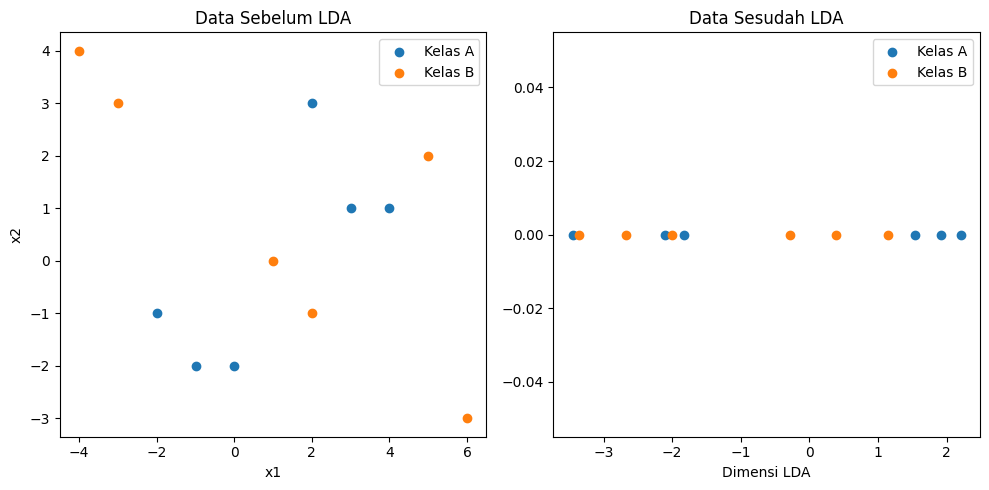

In [589]:
import matplotlib.pyplot as plt

# Plot data sebelum LDA
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X[y == 'A', 0], X[y == 'A', 1], label='Kelas A')
plt.scatter(X[y == 'B', 0], X[y == 'B', 1], label='Kelas B')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Data Sebelum LDA')
plt.legend()

# Plot data sesudah LDA
plt.subplot(1, 2, 2)
plt.scatter(X_lda[y == 'A'], np.zeros_like(X_lda[y == 'A']), label='Kelas A')
plt.scatter(X_lda[y == 'B'], np.zeros_like(X_lda[y == 'B']), label='Kelas B')
plt.xlabel('Dimensi LDA')
plt.title('Data Sesudah LDA')
plt.legend()

plt.tight_layout()
plt.show()

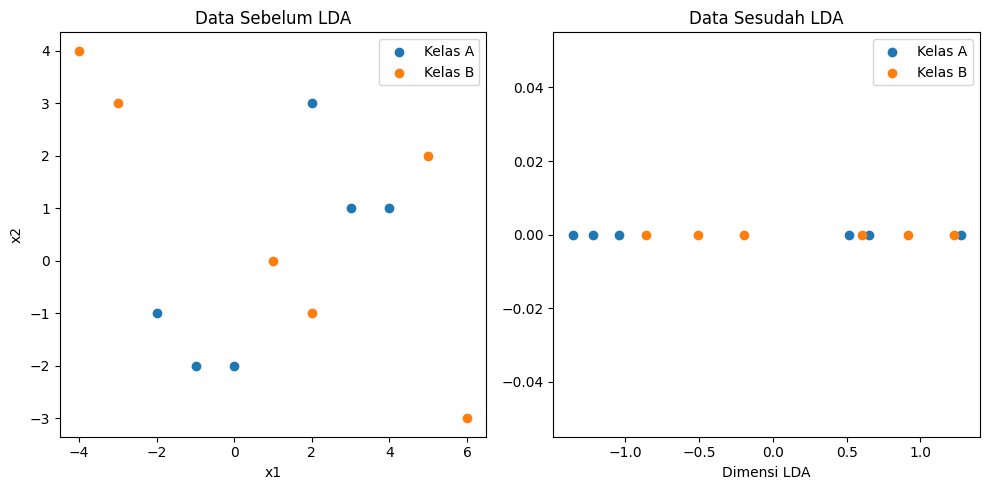

In [590]:
import matplotlib.pyplot as plt

# Plot data sebelum LDA
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X[y == 'A', 0], X[y == 'A', 1], label='Kelas A')
plt.scatter(X[y == 'B', 0], X[y == 'B', 1], label='Kelas B')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Data Sebelum LDA')
plt.legend()

# Plot data sesudah LDA
plt.subplot(1, 2, 2)
plt.scatter(X_lda_sklearn[y == 'A'], np.zeros_like(X_lda_sklearn[y == 'A']), label='Kelas A')
plt.scatter(X_lda_sklearn[y == 'B'], np.zeros_like(X_lda_sklearn[y == 'B']), label='Kelas B')
plt.xlabel('Dimensi LDA')
plt.title('Data Sesudah LDA')
plt.legend()

plt.tight_layout()
plt.show()

## Soal 2

In [591]:
import pandas as pd

# Mendefinisikan data
dataa = {
    'X1': [1, 2, 3, 5, 2, 4, 1, 3, 4, 5],
    'X2': [3, 2, 4, 1, 3, 3, 2, 2, 1, 4],
    'kelas': ['X', 'X', 'Y', 'Y', 'X', 'X', 'X', 'Y', 'Y', 'Y', ]
}

# Membuat DataFrame
df1 = pd.DataFrame(dataa)

# Mendefinisikan fitur (X) dan label kelas (y)
C = df1[['X1', 'X2']].values
d = df1['kelas'].values
df1

,X1,X2,kelas
0,1,3,X
1,2,2,X
2,3,4,Y
3,5,1,Y
4,2,3,X
5,4,3,X
6,1,2,X
7,3,2,Y
8,4,1,Y
9,5,4,Y


In [592]:
# Menghitung mean untuk setiap kelas
mean_X = C[d == 'X'].mean(axis=0)
mean_Y = C[d == 'Y'].mean(axis=0)

# Menampilkan hasil mean untuk masing-masing kelas
print("Mean Kelas X:", mean_X)
print("Mean Kelas Y:", mean_Y)

Mean Kelas X: [2.  2.6]
Mean Kelas Y: [4.  2.4]


In [593]:
# Inisialisasi matriks scatter dalam kelas
Sw1 = np.zeros((2, 2))

# Menghitung matriks scatter dalam kelas (Sw)
for i in range(len(C)):
    x = C[i].reshape(2, 1)
    if d[i] == 'X':
        mean_vecc = mean_X.reshape(2, 1)
    else:
        mean_vecc = mean_Y.reshape(2, 1)
    Sw1 += (x - mean_vecc).dot((x - mean_vecc).T)

# Menampilkan matriks scatter dalam kelas
print("Within-Class Scatter Matrix (Sw):\n", Sw1)

Within-Class Scatter Matrix (Sw):
 [[10.   0. ]
 [ 0.  10.4]]


In [594]:
# Menghitung rata-rata total
mean_tot = np.mean(C, axis=0).reshape(2, 1)
mean_X = mean_X.reshape(2, 1)
mean_Y = mean_Y.reshape(2, 1)

# Menghitung matriks scatter antar kelas (Sb)
Sb1 = 5 * (mean_X - mean_tot).dot((mean_X - mean_tot).T) + 5 * (mean_Y - mean_tot).dot((mean_Y - mean_tot).T)

# Menampilkan matriks scatter antar kelas
print("Between-Class Scatter Matrix (Sb):\n", Sb1)

Between-Class Scatter Matrix (Sb):
 [[10.  -1. ]
 [-1.   0.1]]


In [595]:
# Menyelesaikan persamaan nilai eigen
eig_vals1, eig_vecs1 = np.linalg.eig(np.linalg.inv(Sw1).dot(Sb1))

# Menampilkan nilai eigen dan vektor eigen
print("Nilai Eigen:\n", eig_vals1)
print("Vektor Eigen:\n", eig_vecs1)

Nilai Eigen:
 [1.00961538 0.        ]
Vektor Eigen:
 [[ 0.99540903  0.09950372]
 [-0.09571241  0.99503719]]


In [596]:
# Memilih indeks nilai eigen tertinggi
idx1 = np.argmax(eig_vals1)

# Memilih vektor eigen yang sesuai dengan nilai eigen tertinggi
w1 = eig_vecs1[:, idx1]

# Menampilkan vektor proyeksi
print("Vektor Proyeksi (w):\n", w1)

Vektor Proyeksi (w):
 [ 0.99540903 -0.09571241]


In [597]:
# Memproyeksikan data ke dimensi yang lebih rendah
C_lda1 = C.dot(w1)

# Menampilkan data setelah proyeksi LDA
print("Data setelah proyeksi LDA:\n", C_lda1)

Data setelah proyeksi LDA:
 [0.70827181 1.79939324 2.60337746 4.88133274 1.70368084 3.6944989
 0.80398422 2.79480227 3.88592371 4.59419552]


In [598]:
# Membuat model LDA dengan 1 komponen
lda1 = LinearDiscriminantAnalysis(n_components=1)

# Memproyeksikan data menggunakan LDA Scikit-Learn
C_lda_sklearn = lda1.fit_transform(C, d)

# Menampilkan data setelah proyeksi LDA
print("Data setelah proyeksi LDA (Scikit-Learn):\n", C_lda_sklearn)

Data setelah proyeksi LDA (Scikit-Learn):
 [[-1.8231117 ]
 [-0.84736178]
 [-0.12838815]
 [ 1.9087038 ]
 [-0.93295387]
 [ 0.84736178]
 [-1.7375196 ]
 [ 0.04279605]
 [ 1.01854597]
 [ 1.6519275 ]]


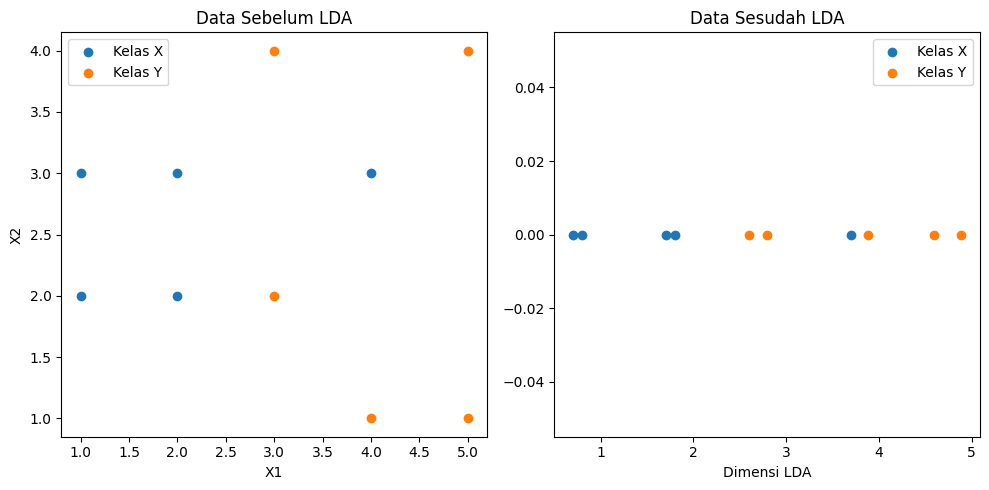

In [599]:
import matplotlib.pyplot as plt

# Plot data sebelum LDA
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(C[d == 'X', 0], C[d == 'X', 1], label='Kelas X')
plt.scatter(C[d == 'Y', 0], C[d == 'Y', 1], label='Kelas Y')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Data Sebelum LDA')
plt.legend()

# Plot data sesudah LDA
plt.subplot(1, 2, 2)
plt.scatter(C_lda1[d == 'X'], np.zeros_like(C_lda1[d == 'X']), label='Kelas X')
plt.scatter(C_lda1[d == 'Y'], np.zeros_like(C_lda1[d == 'Y']), label='Kelas Y')
plt.xlabel('Dimensi LDA')
plt.title('Data Sesudah LDA')
plt.legend()

plt.tight_layout()
plt.show()

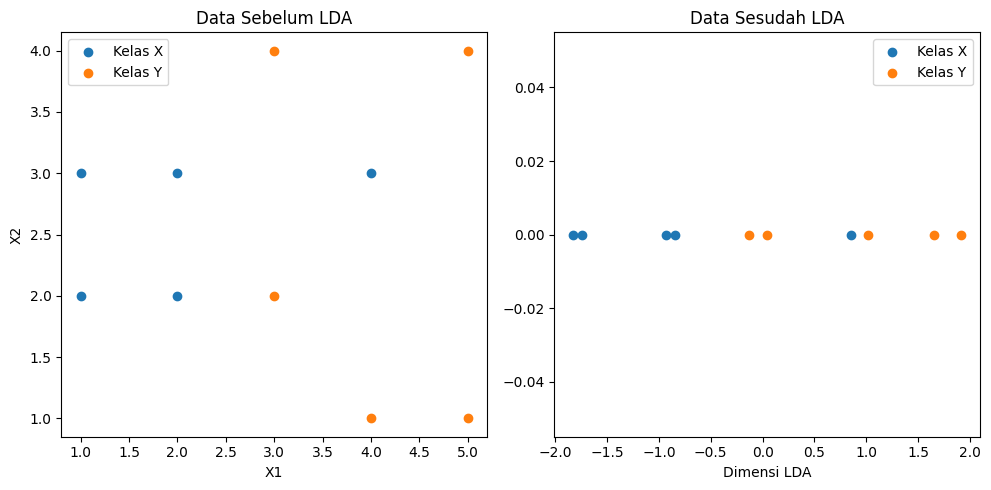

In [600]:
import matplotlib.pyplot as plt

# Plot data sebelum LDA
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(C[d == 'X', 0], C[d == 'X', 1], label='Kelas X')
plt.scatter(C[d == 'Y', 0], C[d == 'Y', 1], label='Kelas Y')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Data Sebelum LDA')
plt.legend()

# Plot data sesudah LDA
plt.subplot(1, 2, 2)
plt.scatter(C_lda_sklearn[d == 'X'], np.zeros_like(C_lda_sklearn[d == 'X']), label='Kelas X')
plt.scatter(C_lda_sklearn[d == 'Y'], np.zeros_like(C_lda_sklearn[d == 'Y']), label='Kelas Y')
plt.xlabel('Dimensi LDA')
plt.title('Data Sesudah LDA')
plt.legend()

plt.tight_layout()
plt.show()